In [1]:
!pip install -q pyomo
from pyomo.environ import *
!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-cbc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp

In [4]:
!pip install -i https://pypi.gurobi.com gurobipy
import gurobipy as gp

Looking in indexes: https://pypi.gurobi.com


In [5]:
#Question-0
#Approach -1
n=5
o1=[1,1,1,1,1]
c1=[85,92,45,27,31]
c2=[92,54,22,20,7]
c3=[96,67,29,20,11]
c4=[-91,-57,-33,-23,-12]
c5=[-99,-75,-26,-24,-41]
c6=[-98,-99,-57,-45,-65]
b= [1,1,1,1,1,1]
lst=[o1,c1,c2,c3,c4,c5,c6]
coeffOP1=pd.DataFrame(lst)


In [6]:
coeffOP1

0   1   2   3   4
0   1   1   1   1   1
1  85  92  45  27  31
2  92  54  22  20   7
3  96  67  29  20  11
4 -91 -57 -33 -23 -12
5 -99 -75 -26 -24 -41
6 -98 -99 -57 -45 -65

In [7]:
model =ConcreteModel()
model.constraints= ConstraintList()
model.x= Var(np.arange(n),domain=Reals)
model.u=Var(np.arange(n),domain=Reals)

model.objective = Objective(expr=sum(model.u[i]*coeffOP1[i][0] for i in range(5)), sense=minimize)
for i in range(6):
  model.constraints.add(sum(coeffOP1[j][i+1]*model.x[j] for j in range(5)) >= b[i])

for i in range(n):


    model.constraints.add(expr = model.u[i] >= model.x[i])
    model.constraints.add(expr = model.u[i] >= -model.x[i])
    model.constraints.add(expr = model.u[i]>=0)



In [8]:
model.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   21 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    u : Size=5, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None : False :  True :  Reals
          4 :  None :  None :  None : False :  True :  Reals
    x : Size=5, Index=x_index
        Key

In [9]:
optLP = SolverFactory('cbc')
result = optLP.solve(model)

In [10]:
print(result)


Problem: 
- Name: unknown
  Lower bound: 0.5479557323
  Upper bound: 0.5479557323
  Number of objectives: 1
  Number of constraints: 21
  Number of variables: 10
  Number of nonzeros: 5
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 13
  Error rc: 0
  Time: 0.020871877670288086
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [11]:
model.objective()

0.547955725

In [12]:
for i in range(5):
  print('x',[i],model.x[i]())
  end=''
  print('u',[i],model.u[i]())

x [0] -0.046448575
u [0] 0.046448575
x [1] 0.18612441
u [1] 0.18612441
x [2] -0.17131802
u [2] 0.17131802
x [3] 0.0
u [3] 0.0
x [4] -0.14406472
u [4] 0.14406472


In [13]:
model2 =ConcreteModel()
model2.constraints= ConstraintList()
model2.a= Var(np.arange(n),domain=NonNegativeReals)
model2.b=Var(np.arange(n),domain=NonNegativeReals)

model2.objective = Objective(expr=sum(model2.b[i]+model2.a[i] for i in range(5)), sense=minimize)
for i in range(6):
  model2.constraints.add(sum(coeffOP1[j][i+1]*(model2.a[j]-model2.b[j]) for j in range(5)) >= b[i])



In [14]:
model2.pprint()

3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}

2 Var Declarations
    a : Size=5, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
          4 :     0 :  None :  None : False :  True : NonNegativeReals
    b : Size=5, Index=b_index
        Key : Lowe

In [15]:
optOP = SolverFactory('cbc')
result1 = optOP.solve(model2)
print(result1)


Problem: 
- Name: unknown
  Lower bound: 0.5479557323
  Upper bound: 0.5479557323
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 10
  Number of nonzeros: 10
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 5
  Error rc: 0
  Time: 0.018021583557128906
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [16]:
for i in range(5):
  print('a',[i],model2.a[i]())
  end=''
  print('b',[i],model2.b[i]())

a [0] 0.0
b [0] 0.046448575
a [1] 0.18612441
b [1] 0.0
a [2] 0.0
b [2] 0.17131802
a [3] 0.0
b [3] 0.0
a [4] 0.0
b [4] 0.14406472


In [17]:
#Answer-1
interest_rate = pd.read_csv('Lab08_InterestRate.csv')
interest_rate

Year  Interest Rate   Ratio  Rating
0   2003         0.0416  0.3615    85.6
1   2004         0.0312  0.2820    91.9
2   2005         0.0354  0.3010    89.1
3   2006         0.0331  0.3862    90.4
4   2007         0.0399  0.3578    86.3
5   2008         0.0501  0.4413    74.7
6   2009         0.0421  0.6753    79.8
7   2010         0.0507  0.6777    74.3
8   2011         0.0431  0.6585    84.4
9   2012         0.0437  0.6702    84.1
10  2013         0.0398  0.3289    86.8
11  2014         0.0274  0.2473    93.7
12  2015         0.0298  0.2762    92.3
13  2016         0.0261  0.3222    94.0
14  2017         0.0358  0.2792    88.9
15  2018         0.0504  0.3609    74.3
16  2019         0.0478  0.6187    74.0
17  2020         0.0549  0.6176    69.8
18  2021         0.0468  0.6004    81.6
19  2022         0.0478  0.6119    81.0

In [18]:
interest_rate.iloc[0][1]

0.0416

In [19]:
Actual_Rate=[]
for i in range(20):
  Actual_Rate.append(interest_rate.iloc[i][1])

Actual_Rate=np.array(Actual_Rate)

In [20]:
A=[]
for i in range(20):
  a=[]
  a.append(1)
  a.append(interest_rate.iloc[i][2])
  a.append(interest_rate.iloc[i][3])
  A.append(a)
A=np.array(A)
A

array([[ 1.    ,  0.3615, 85.6   ],
       [ 1.    ,  0.282 , 91.9   ],
       [ 1.    ,  0.301 , 89.1   ],
       [ 1.    ,  0.3862, 90.4   ],
       [ 1.    ,  0.3578, 86.3   ],
       [ 1.    ,  0.4413, 74.7   ],
       [ 1.    ,  0.6753, 79.8   ],
       [ 1.    ,  0.6777, 74.3   ],
       [ 1.    ,  0.6585, 84.4   ],
       [ 1.    ,  0.6702, 84.1   ],
       [ 1.    ,  0.3289, 86.8   ],
       [ 1.    ,  0.2473, 93.7   ],
       [ 1.    ,  0.2762, 92.3   ],
       [ 1.    ,  0.3222, 94.    ],
       [ 1.    ,  0.2792, 88.9   ],
       [ 1.    ,  0.3609, 74.3   ],
       [ 1.    ,  0.6187, 74.    ],
       [ 1.    ,  0.6176, 69.8   ],
       [ 1.    ,  0.6004, 81.6   ],
       [ 1.    ,  0.6119, 81.    ]])

In [21]:
p=2*np.matmul(A.transpose(),A)
p



array([[4.00000000e+01, 1.81496000e+01, 3.35400000e+03],
       [1.81496000e+01, 9.25515268e+00, 1.49040692e+03],
       [3.35400000e+03, 1.49040692e+03, 2.83313880e+05]])

In [22]:
q=-2*np.matmul(Actual_Rate.transpose(),A)
q

array([  -1.635     ,   -0.77927632, -134.82612   ])

In [23]:
result=solve_qp(p,q,G=None,h=None,A=None,b=None,lb=None,ub=None,solver='osqp')
result

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 0.12237613,  0.00576031, -0.00100316])

In [24]:
import seaborn as sns

<ipython-input-25-d45d249e49a1>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')
<ipython-input-25-d45d249e49a1>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')


([<matplotlib.axis.XTick at 0x7977d6243af0>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

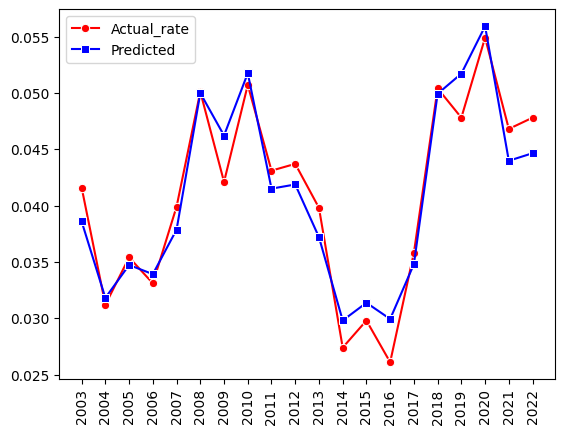

In [25]:
x=np.array(result)
forecast=np.matmul(A,x)
years = interest_rate.Year.to_list()
sns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')
plt.xticks(years, rotation = 90)

In [26]:
#with lower bound of b0
l=np.array([0,-np.Inf,-np.Inf])
result_l=solve_qp(p,q,G=None,h=None,A=None,b=None,lb=l,ub=None,solver='osqp')
result_l

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/osqp/utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


array([ 0.09128332,  0.01686998, -0.00069351])

<ipython-input-27-9600e8ebd117>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')
<ipython-input-27-9600e8ebd117>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')


([<matplotlib.axis.XTick at 0x7977d605d510>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

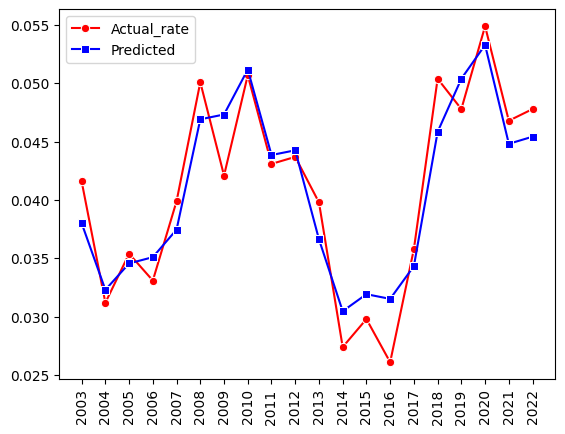

In [27]:
x1=np.array(result_l)
forecast=np.matmul(A,x1)
years = interest_rate.Year.to_list()
sns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')
plt.xticks(years, rotation = 90)

In [28]:
forecast

array([0.0380174 , 0.03230713, 0.03456948, 0.03510524, 0.03746952,
       0.04692288, 0.04733355, 0.05118835, 0.04385999, 0.04426543,
       0.03663523, 0.03047342, 0.03193188, 0.03152893, 0.03434042,
       0.04584394, 0.05040107, 0.05329525, 0.04482168, 0.04543179])

In [29]:
Actual_Rate[1]

0.0312

In [30]:
model_2 =ConcreteModel()
model_2.constraints= ConstraintList()
model_2.x= Var(np.arange(3),domain=Reals)
model_2.u=Var(np.arange(3),domain=Reals)

model_2.objective = Objective(expr=sum(Actual_Rate[i]-(1*model_2.u[0]+interest_rate.iloc[i][2]*model_2.u[1]+interest_rate.iloc[i][3]*model_2.u[2]) for i in range(20)), sense=minimize)
for i in range(20):
  model_2.constraints.add(expr=Actual_Rate[i]-(1*model_2.u[0]+interest_rate.iloc[i][2]*model_2.u[1]+interest_rate.iloc[i][3]*model_2.u[2])>=0)
for i in range(3):


    model_2.constraints.add(expr = model_2.u[i] >= model_2.x[i])
    model_2.constraints.add(expr = model_2.u[i] >= -model_2.x[i])
    model_2.constraints.add(expr = model_2.u[i]>=0)



In [31]:
model_2.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

2 Var Declarations
    u : Size=3, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
    x : Size=3, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True 

In [32]:
optOP = SolverFactory('cbc')
result_1 = optOP.solve(model_2)
print(result_1)


Problem: 
- Name: unknown
  Lower bound: 0.1762907108
  Upper bound: 0.1762907108
  Number of objectives: 1
  Number of constraints: 29
  Number of variables: 7
  Number of nonzeros: 3
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 4
  Error rc: 0
  Time: 0.036177635192871094
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [33]:
for i in range(3):
  print('x',[i],model_2.x[i]())
  end=''
  print('u',[i],model_2.u[i]())

x [0] 0.01150017
u [0] 0.01150017
x [1] 0.045312943
u [1] 0.045312943
x [2] 0.0
u [2] 0.0


In [34]:
print(model_2.objective())


0.17629070486360002


In [35]:
'''
linear=[]
for i in range(20):
  a=1*model_2.u[0]()+interest_rate.iloc[i][2]*model_2.u[1]()+interest_rate.iloc[i][3]*model_2.u[2]()
  print(a)
  linear.append(a)
forecast_l=np.array(linear)
years = interest_rate.Year.to_list()
sns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')
sns.lineplot(x = years, y = forecast_l, palette = 'pastel', marker='s', color = 'blue', label = 'Forecast')
plt.xticks(years, rotation = 90)
'''

"\nlinear=[]\nfor i in range(20):\n  a=1*model_2.u[0]()+interest_rate.iloc[i][2]*model_2.u[1]()+interest_rate.iloc[i][3]*model_2.u[2]()\n  print(a)\n  linear.append(a)\nforecast_l=np.array(linear)\nyears = interest_rate.Year.to_list()\nsns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')\nsns.lineplot(x = years, y = forecast_l, palette = 'pastel', marker='s', color = 'blue', label = 'Forecast')\nplt.xticks(years, rotation = 90)\n"

In [36]:
#Answer-1(part-3&4)


In [37]:
#Op-1
model_op1 = ConcreteModel()
n = 20
model_op1.z = Var(np.arange(n))
model_op1.b= Var(np.arange(3))
model_op1.obj = Objective(expr = sum(model_op1.z[i] for i in range(n)), sense = minimize)
model_op1.constraints = ConstraintList()
for i in range(n):
  model_op1.constraints.add( expr = Actual_Rate[i] - model_op1.b[0] - model_op1.b[1]*interest_rate.iloc[i][2] - model_op1.b[2]*interest_rate.iloc[i][3] <= model_op1.z[i])
  model_op1.constraints.add( expr = -Actual_Rate[i] + model_op1.b[0] + model_op1.b[1]*interest_rate.iloc[i][2] + model_op1.b[2]*interest_rate.iloc[i][3] <= model_op1.z[i])
  model_op1.constraints.add(expr = model_op1.z[i]>=0)
model_op1.constraints.add(expr = model_op1.b[0] >= 0)
model_op1.pprint()

3 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    z_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

2 Var Declarations
    b : Size=3, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  

In [38]:
#OP2:
model_op2 = ConcreteModel()
n = 20
model_op2.x = Var(np.arange(n))
model_op2.y= Var(np.arange(n))
model_op2.b = Var(np.arange(3))
model_op2.obj = Objective(expr = sum(model_op2.x[i] + model_op2.y[i] for i in range(n)), sense = minimize)
model_op2.constraints = ConstraintList()
for i in range(n):
  model_op2.constraints.add( expr = Actual_Rate[i] - model_op2.b[0] - model_op2.b[1]*interest_rate.iloc[i][2] - model_op2.b[2]*interest_rate.iloc[i][3] == model_op2.x[i]- model_op2.y[i])
  model_op2.constraints.add(expr = model_op2.x[i]>=0)
  model_op2.constraints.add(expr = model_op2.y[i]>=0)
model_op2.constraints.add(expr = model_op2.b[0] >= 0)
model_op2.pprint()

4 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
    y_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

3 Var Declarations
    b : Size=3, Index=b

In [39]:
optOP = SolverFactory('cbc')
result_op1 = optOP.solve(model_op1)
print(result_op1)


Problem: 
- Name: unknown
  Lower bound: 0.0379290902
  Upper bound: 0.0379290902
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 23
  Number of nonzeros: 20
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 22
  Error rc: 0
  Time: 0.056764841079711914
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [40]:
model_op1.obj()

0.0379290903

In [41]:
aoptOP = SolverFactory('cbc')
result_op2= optOP.solve(model_op2)
print(result_op2)


Problem: 
- Name: unknown
  Lower bound: 0.0379290902
  Upper bound: 0.0379290902
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 43
  Number of nonzeros: 40
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 20
  Error rc: 0
  Time: 0.037744760513305664
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [42]:
model_op2.obj()

0.0379290903

In [43]:
bi=[]
for i in range(3):
  a=model_op1.b[i]()
  bi.append(a)
bi

[0.11547155, 0.0093102734, -0.00093012282]

In [44]:
forecast_linear=[]
for i in range(20):
  forecast_linear.append(bi[0]+interest_rate.iloc[i][2]*bi[1]+interest_rate.iloc[i][3]*bi[2])
forecast_linear=np.array(forecast_linear)
forecast_linear

array([0.0392187 , 0.03261876, 0.0354    , 0.03498407, 0.03853317,
       0.0501    , 0.04753498, 0.052673  , 0.0431    , 0.04348797,
       0.03779904, 0.03062147, 0.03219271, 0.03103978, 0.03538306,
       0.0497235 , 0.05240273, 0.056299  , 0.04516342, 0.04582856])

<ipython-input-45-9e3194384a45>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')
<ipython-input-45-9e3194384a45>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'blue', label = 'Forecast')
<ipython-input-45-9e3194384a45>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast_linear, palette = 'pastel', marker='d', color = 'green', label = 'Forecast_linear')


([<matplotlib.axis.XTick at 0x7977d5f7bfd0>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

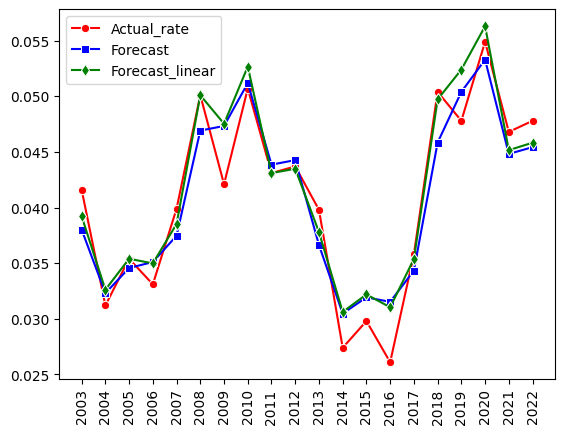

In [45]:

years = interest_rate.Year.to_list()
sns.lineplot(x = years, y= Actual_Rate, palette='pastel', marker='o',color = 'red', label = 'Actual_rate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'blue', label = 'Forecast')
sns.lineplot(x = years, y = forecast_linear, palette = 'pastel', marker='d', color = 'green', label = 'Forecast_linear')
plt.xticks(years, rotation = 90)

In [46]:
#ANS-2:using quadratic we solve our given problem using qp solvers osqp

In [47]:
#CREATING P MATRIX
P = np.array([[12983, 0, 0, 0],
              [0, 2400, 0, 0],
              [0, 0, 440, -52.42],
              [0, 0, -52.42, 68.7]])


q = np.array([-6748000 ,-1184000 ,-420000 ,-70000])

G =  np.array([[-259.66 , -1045.5875 , 6.655 , 9.016],
             [-584.235 , -103.74 , 10.66 , 7.728],
             [6491.5 , 0 , 0 , 0],
             [0 , 1200 , 0 , 0],
             [0 , 220 , 0 , -25.76],
              [0 , 34.35 , -26.66 , 0]])
h = np.array([-781620  ,-35000 ,6748000 ,1184000 ,420000 ,70000])

A = np.array([482, 32, 21, 7])
b = np.array([193949])
lower = np.array([0,0,0,0])
x = solve_qp(P, q, G = G, h = h, A = A, b =b, lb=lower, ub=None, solver = "osqp")

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [48]:
print(x)

[310.22403488 683.28825773 768.95721188 915.38421284]


In [49]:
prize=np.array(x)
px=-np.matmul(P,prize)
xtrans_px=0.5*np.matmul(prize.transpose(),px)

q_trans=q.transpose()
qx=-np.matmul(prize,q)
max_revenue=xtrans_px+qx
print('Maximum Revenue:',max_revenue)


Maximum Revenue: 1982479644.2045825


/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


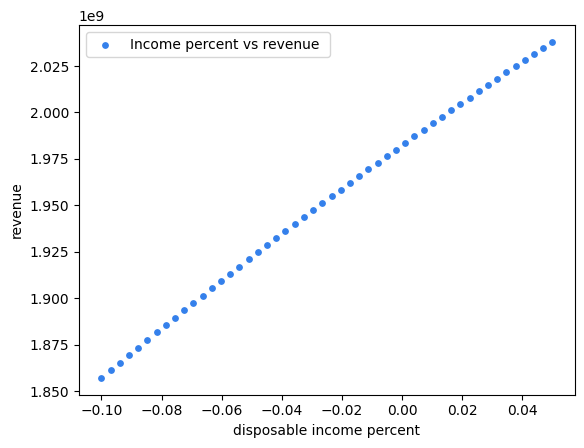

In [72]:
list1 = np.linspace(-0.1,0.05,50)
results = []
for i in list1:
  P = np.array([[12983, 0, 0, 0],
              [0, 2400, 0, 0],
              [0, 0, 440, -52.42],
              [0, 0, -52.42, 68.7]])

  q = np.array([-6748000 ,-1184000 ,-420000 ,-70000])

  G =  np.array([[-259.66 , -1045.5875 , 6.655 , 9.016],
              [-584.235 , -103.74 , 10.66 , 7.728],
              [6491.5 , 0 , 0 , 0],
              [0 , 1200 , 0 , 0],
              [0 , 220 , 0 , -25.76],
                [0 , 34.35 , -26.66 , 0]])
  h = np.array([-781620  ,-35000 ,6748000 ,1184000 ,420000 ,70000])

  A = np.array([482, 32, 21, 7])
  k = 193949*(1+i)
  b = np.array([k])
  lower = np.array([0,0,0,0])
  x = solve_qp(P, q, G = G, h = h, A = A, b =b, lb=lower, ub=None, solver = "osqp")
  revenue =  -0.5*x@P@x - q@x #using standard notation for matrix opertaions
  results.append(revenue)
plt.scatter(list1, results,color = "#3480eb", s =15)
plt.xlabel(" income percent")
plt.ylabel("revenue")

plt.legend(labels = [r"Income percent vs revenue "])

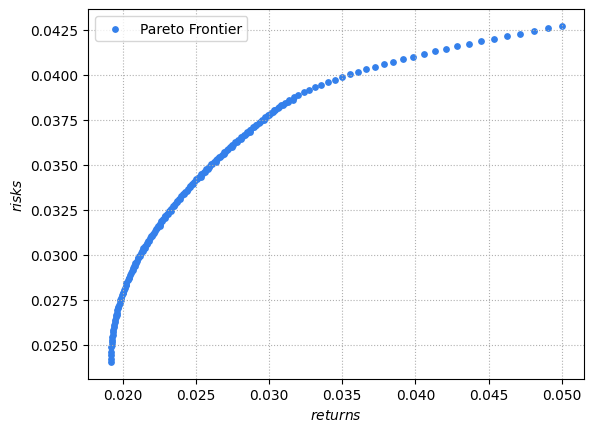

In [60]:
#Answer-3 part-A
n = 101 #no. of random points to be taken

#generating randome samples of allocation
samples = []
w1 = np.linspace(0,1,n)
w2 = np.linspace(0,1,n)
for one in w1:
  for two in w2:
    if(one+two <=1):
      samples.append((one,two,1- one -two))
      #risk function

def risk(sample, covariance):
  return 0.5*np.matmul(sample.transpose(), np.matmul(covariance, sample))

#given data
Mo= 0.02
M = np.array([0.0427,0.0015,0.0285])
covariance = np.array([[0.1,0.0018, 0.0011],[0.0012,0.1044,0.0026],[0.0011,0.00026,0.1411]])


#defining return function
def preturn(sample, M):
  return np.matmul(sample.transpose(), M)


#storing valid results
risks = []
returns = []
allocation = []
for sample in samples:
  w = np.array([sample[0],sample[1],sample[2]])
  #checking constraint
  if np.matmul(w.transpose(), M) >= Mo:
    allocation.append(w)
    risks.append(risk(w,covariance))
    returns.append(preturn(w,M))
    #least risk entry
min(risks)
allocation[np.argmin(risks)]
returns[np.argmin(risks)]
paretopoints = []
n = len(allocation)
for i in range(n):
  flag = 0
  for j in range(n):
    if i!=j:
      if ((risks[i] > risks[j]) and (returns[i] <= returns[j])) or ((risks[i] >= risks[j]) and (returns[i] < returns[j])):
        flag = 1
        break
  if flag == 0:
    paretopoints.append(allocation[i])
    returnspareto = [preturn(sample,M) for sample in paretopoints]
riskspareto = [risk(sample, covariance) for sample in paretopoints]
# pareto for return risk tradeoff

plt.scatter( riskspareto,returnspareto ,color = "#3480eb", s =15)
plt.xlabel("$returns$")
plt.ylabel("$risks$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Pareto Frontier"])
#finding optimal allocation using ;risk avertion

lamda = [10**((v/20)-1) for v in range(1,101)]

In [61]:
results = []
for lm in lamda:
  P  = lm*covariance
  q = -M
  b=np.array([1])
  A = np.array([1, 1, 1])
  lb = np.array([0,0,0])
  res = solve_qp(P, q, G=None, h=None, A = A, b = b, lb=lb, ub=None, solver = "osqp")
  results.append(res)
print(results)

[array([ 1.00004232e+00, -1.90538606e-05, -2.32501202e-05]), array([ 1.00008123e+00, -3.66137758e-05, -4.45868278e-05]), array([ 1.00295778, -0.00166064, -0.00158207]), array([ 0.96181114, -0.00155688,  0.03946662]), array([ 9.20273380e-01, -6.01997596e-06,  7.97326438e-02]), array([ 8.83931245e-01, -1.85132004e-05,  1.16087276e-01]), array([ 8.51552489e-01, -4.88358744e-05,  1.48496366e-01]), array([ 8.22716063e-01, -1.12134726e-04,  1.77396113e-01]), array([ 7.97049434e-01, -2.26595533e-04,  2.03177243e-01]), array([ 7.74218956e-01, -4.05720508e-04,  2.26186910e-01]), array([ 7.53917644e-01, -6.45111467e-04,  2.46727699e-01]), array([ 0.73585168, -0.00090597,  0.26505461]), array([ 0.7195128 , -0.00073082,  0.28121829]), array([ 7.04860707e-01, -4.20087803e-04,  2.95559537e-01]), array([ 0.69267072, -0.00187559,  0.30895677]), array([0.67641814, 0.00629502, 0.31704444]), array([0.64391939, 0.04449718, 0.3113506 ]), array([0.61495216, 0.07854449, 0.30627403]), array([0.58913737, 0.108

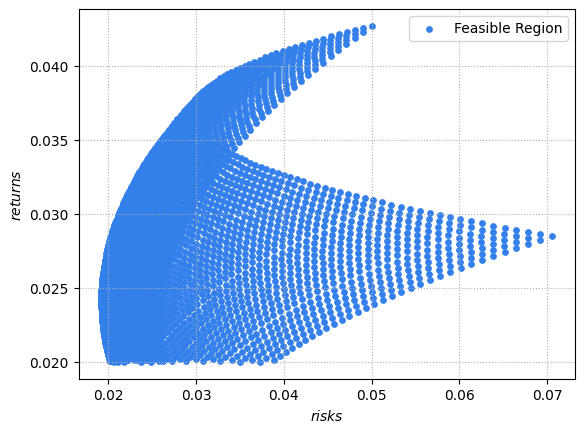

In [62]:
#printing the feasible region we get
plt.scatter(risks,returns,color = "#3480eb", s =15)
plt.xlabel("$risks$")
plt.ylabel("$returns$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Feasible Region"])